In [78]:
from numpy import loadtxt
from pandas import read_csv
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot

In [79]:
dataframe = read_csv('resources/websites_full.csv', delimiter=',', index_col=0).set_index('name')
#dataframe = dataframe.groupby('https://edition.cnn.com/2021/09/06/asia/taliban-afghanistan-pregnant-policewoman-murder-intl/index.html').sum()
dataframe

,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
name,,,,,,,,,,,,,,,,,,,,,
https://edition.cnn.com/2021/09/06/asia/taliban-afghanistan-pregnant-policewoman-murder-intl/index.html,13,15,14,1,1,387,4,275,5,89,...,479,3402031,39,458049,138,36064,13,97,70,40
https://edition.cnn.com/2021/09/06/americas/columbus-statue-indigenous-woman-mexico-city-cec/index.html,4,11,0,1,0,210,3,253,7,11,...,479,3548487,39,458831,134,41216,19,97,70,42
https://edition.cnn.com/2021/09/06/entertainment/stanley-tucci-cancer/index.html,8,9,14,1,2,401,4,271,6,90,...,587,4748839,41,598947,163,54200,22,97,70,35
https://edition.cnn.com/2021/09/06/world/perseverance-rover-mars-sample-helicopter-scn/index.html,11,11,4,1,1,295,3,256,14,17,...,542,3988747,42,594764,156,36064,14,97,70,33
https://www.bbc.com/news/av/world-asia-india-58498881,10,2,1,1,4,246,1,104,15,203,...,16,1275281,17,49244,56,134516,82,100,100,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://americasfreedomfighters.com/fda-makes/,153,22,2,3,8,192,20,124,37,80,...,119,3506248,56,169485,263,25664,17,20,-200,20
https://americasfreedomfighters.com/man-has-to-say/,113,18,0,3,2,192,21,113,37,76,...,127,4411248,63,240498,279,25664,11,20,-200,21
https://americasfreedomfighters.com/texas-they-got-son/,140,3,6,4,2,195,20,114,37,81,...,119,3675811,57,237474,263,25664,17,20,-200,21


In [80]:
fake = pd.read_csv('resources/training_data/not_that_legit.txt', names=["name"])
true = pd.read_csv('resources/training_data/legit.txt', names=["name"])
fake['label'] = 1
true['label'] = 0
fake = fake.append(true)
fake = fake.sort_values(by=['name'], ignore_index=True)
labels = fake['label']
fake = fake.set_index('name')
df_final = dataframe.merge(fake, left_on='name', right_on='name')

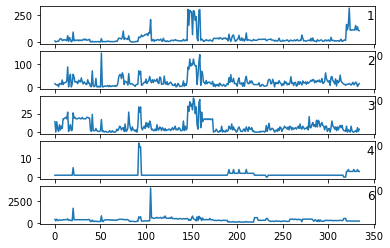

In [81]:
dataset = dataframe.values
groups = [0, 1, 2, 3, 5]
i = 1
# plot each column
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(dataset[:, group])
    pyplot.title(dataframe.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

In [82]:
from numpy import unique
from numpy import argmax
from pandas import read_csv
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Embedding
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam

In [83]:
df = df_final.copy()
normalized_df=(df-df.min())/(df.max()-df.min())
normalized_df.describe()
dataset = normalized_df.values

In [89]:
X, y = dataset[:,:-1], dataset[:,-1]
n_features = X.shape

y = LabelEncoder().fit_transform(y)
n_class = len(unique(y))
# Separate the test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Split the remaining data to train and validation
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=1)
# definiowanie modeli
model = Sequential()
model.add(Embedding(100,64,input_length = 40))
model.add(LSTM(units = 256, return_sequences=True))
model.add(LSTM(units=256))
model.add(Dropout(0.35))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.35))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(units=2,activation = 'softmax'))
#from tensorflow.keras.optimizers import SGD
#opt = SGD(lr=0.005)
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['acc'])
# dopasowanie
history = model.fit(X_train, y_train, epochs=150, batch_size=95, validation_split=0.33)

yhat = model.predict(X_test)
yhat = argmax(yhat, axis=-1).astype('int')
acc = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % acc)

Epoch 1/150
2/2 [==============================] - 4s 931ms/step - loss: 0.6937 - acc: 0.4611 - val_loss: 0.6900 - val_acc: 0.6517
Epoch 2/150
2/2 [==============================] - 1s 420ms/step - loss: 0.6948 - acc: 0.4556 - val_loss: 0.6914 - val_acc: 0.6517
Epoch 3/150
2/2 [==============================] - 1s 451ms/step - loss: 0.6937 - acc: 0.4611 - val_loss: 0.6825 - val_acc: 0.6517
Epoch 4/150
2/2 [==============================] - 1s 426ms/step - loss: 0.6939 - acc: 0.5000 - val_loss: 0.6807 - val_acc: 0.6517
Epoch 5/150
2/2 [==============================] - 1s 409ms/step - loss: 0.6942 - acc: 0.5111 - val_loss: 0.6783 - val_acc: 0.6517
Epoch 6/150
2/2 [==============================] - 1s 421ms/step - loss: 0.6902 - acc: 0.5000 - val_loss: 0.6859 - val_acc: 0.6517
Epoch 7/150
2/2 [==============================] - 1s 416ms/step - loss: 0.6889 - acc: 0.5500 - val_loss: 0.6876 - val_acc: 0.6517
Epoch 8/150
2/2 [==============================] - 1s 414ms/step - loss: 0.6956 - a

2/2 [==============================] - 1s 453ms/step - loss: 0.5173 - acc: 0.7500 - val_loss: 0.6811 - val_acc: 0.7528
Epoch 64/150
2/2 [==============================] - 1s 462ms/step - loss: 0.5122 - acc: 0.7444 - val_loss: 0.7223 - val_acc: 0.7079
Epoch 65/150
2/2 [==============================] - 1s 452ms/step - loss: 0.5876 - acc: 0.7222 - val_loss: 0.5595 - val_acc: 0.7079
Epoch 66/150
2/2 [==============================] - 1s 446ms/step - loss: 0.6013 - acc: 0.7167 - val_loss: 0.5488 - val_acc: 0.7191
Epoch 67/150
2/2 [==============================] - 1s 453ms/step - loss: 0.6243 - acc: 0.7167 - val_loss: 0.5792 - val_acc: 0.7528
Epoch 68/150
2/2 [==============================] - 1s 459ms/step - loss: 0.6297 - acc: 0.7111 - val_loss: 0.5755 - val_acc: 0.7528
Epoch 69/150
2/2 [==============================] - 1s 460ms/step - loss: 0.6038 - acc: 0.7167 - val_loss: 0.5435 - val_acc: 0.7191
Epoch 70/150
2/2 [==============================] - 1s 450ms/step - loss: 0.5825 - acc: 0

Epoch 125/150
2/2 [==============================] - 1s 629ms/step - loss: 0.4446 - acc: 0.7722 - val_loss: 0.5358 - val_acc: 0.7640
Epoch 126/150
2/2 [==============================] - 1s 612ms/step - loss: 0.4580 - acc: 0.7556 - val_loss: 0.5335 - val_acc: 0.7528
Epoch 127/150
2/2 [==============================] - 1s 630ms/step - loss: 0.4435 - acc: 0.7667 - val_loss: 0.5270 - val_acc: 0.7640
Epoch 128/150
2/2 [==============================] - 1s 644ms/step - loss: 0.4714 - acc: 0.7500 - val_loss: 0.5411 - val_acc: 0.7640
Epoch 129/150
2/2 [==============================] - 1s 591ms/step - loss: 0.4588 - acc: 0.7333 - val_loss: 0.5466 - val_acc: 0.7640
Epoch 130/150
2/2 [==============================] - 1s 590ms/step - loss: 0.4513 - acc: 0.7833 - val_loss: 0.5336 - val_acc: 0.7640
Epoch 131/150
2/2 [==============================] - 1s 602ms/step - loss: 0.4588 - acc: 0.7611 - val_loss: 0.5204 - val_acc: 0.7640
Epoch 132/150
2/2 [==============================] - 1s 594ms/step - 

Accuracy: 0.706


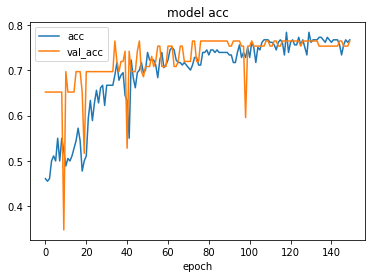

In [90]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model acc')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc='upper left')
plt.show()

In [91]:
yhat = model.predict(X)
yhat = argmax(yhat, axis=-1).astype('int')
#acc = accuracy_score(y_test, yhat)
from sklearn.metrics import confusion_matrix
confusion_matrix(y, yhat)

array([[153,  35],
       [ 48, 101]], dtype=int64)

In [43]:
model.save('model/acc70_binary')
model.summary()

INFO:tensorflow:Assets written to: model/acc70_binary\assets


INFO:tensorflow:Assets written to: model/acc70_binary\assets


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 40, 64)            6400      
                                                                 
 lstm_20 (LSTM)              (None, 40, 256)           328704    
                                                                 
 lstm_21 (LSTM)              (None, 256)               525312    
                                                                 
 dropout_20 (Dropout)        (None, 256)               0         
                                                                 
 dense_30 (Dense)            (None, 256)               65792     
                                                                 
 dropout_21 (Dropout)        (None, 256)               0         
                                                                 
 dense_31 (Dense)            (None, 256)             